In [10]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import kaggle

from pycaret.regression import *

In [2]:
data = "../data/"

In [3]:
# download Possum dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('abrambeyer/openintro-possum', path=data, unzip=True)

In [5]:
# read the data
df = pd.read_csv(data + 'possum.csv')
# view the data
df.head(3)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


In [6]:
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

#### Analysing target column

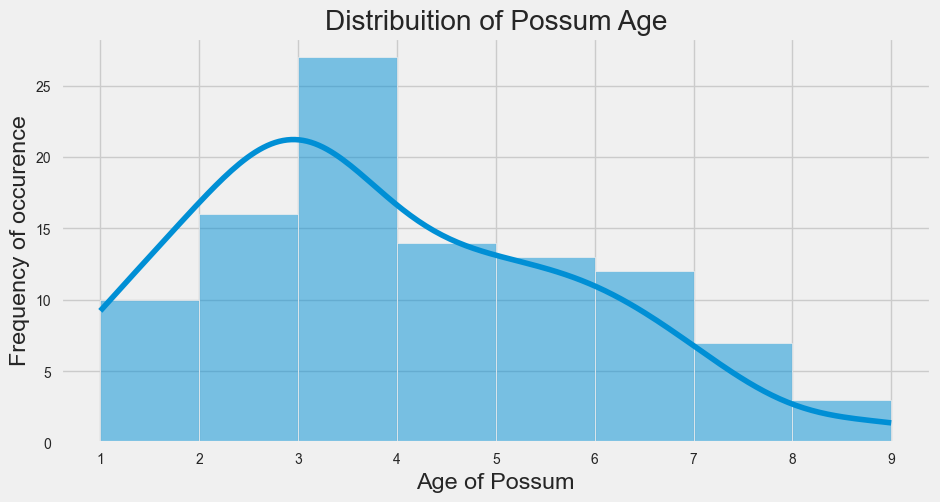

In [14]:
# Checking the distribution of the variable:
# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(15,6))
# sns.distplot(df.age)
# plt.xlabel('Age')
# plt.title('Distribuition of Possum Age');

# visualize a distribution of the ages of the possum
plt.figure( figsize=(10, 5))
sns.histplot(df['age'], kde=True)
plt.title('Distribuition of Possum Age')
plt.ylabel('Frequency of occurence')
plt.xlabel('Age of Possum')
plt.show()

#### Build Model

In [18]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(include='number').nunique()
print(cardinality.sort_values())

site          7
age           9
taill        19
chest        19
belly        24
totlngth     34
eye          35
skullw       64
earconch     69
hdlngth      71
footlgth     75
case        104
dtype: int64


In [19]:
# Assign target to variable
target = 'age'

# identify columns to ignore
ignored = 'case'

# Identify categorical features
cat_features = [col for col in df.columns 
                if col != target 
                and col != ignored 
                and not pd.api.types.is_numeric_dtype(df[col])
                or (col != target and pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() < 8) # 8 to capture the site column
                ]

numeric_features = [col for col in df.columns
                   if col not in target and col not in ignored and col not in cat_features]

# view categorical features
cat_features

['site', 'Pop', 'sex']

In [23]:
numeric_features

['hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

In [24]:
# get the total number of missing data
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [25]:
# since the target column has missing values, the rows has to be dropped
# Drop rows where column 'age' has missing values
df = df.dropna(subset=['age'])

In [26]:
experiment = setup(data=df, target= target, categorical_features=cat_features,
                    numeric_features = numeric_features,
                    ignore_features=ignored,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,age
2,Target type,Regression
3,Original data shape,"(102, 14)"
4,Transformed data shape,"(102, 19)"
5,Transformed train set shape,"(71, 19)"
6,Transformed test set shape,"(31, 19)"
7,Ignore features,4
8,Ordinal features,2
9,Numeric features,9


In [27]:
# get the best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.4702,3.4886,1.7714,0.0136,0.3510,0.4666,0.0580
lightgbm,Light Gradient Boosting Machine,1.6028,3.6769,1.8578,-0.0826,0.3819,0.5496,0.2290
rf,Random Forest Regressor,1.5906,3.7408,1.8802,-0.1306,0.3832,0.5511,0.1230
br,Bayesian Ridge,1.6186,3.9060,1.9188,-0.1673,0.4002,0.5859,0.0360
dummy,Dummy Regressor,1.6085,3.8879,1.9166,-0.1681,0.4001,0.5859,0.0400
llar,Lasso Least Angle Regression,1.6224,3.9444,1.9254,-0.1717,0.4015,0.5900,0.0450
lasso,Lasso Regression,1.6224,3.9444,1.9254,-0.1717,0.4015,0.5900,0.0390
en,Elastic Net,1.6343,3.9464,1.9274,-0.1738,0.4008,0.5912,0.0390
et,Extra Trees Regressor,1.6365,3.9597,1.9394,-0.2446,0.3912,0.5553,0.0940
omp,Orthogonal Matching Pursuit,1.6631,4.1808,1.9814,-0.2574,0.4101,0.6040,0.0380


In [28]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

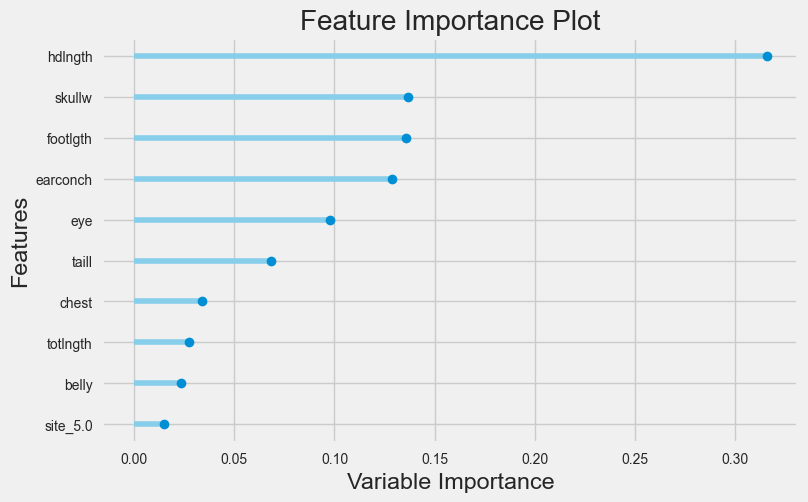

In [29]:
# plot feature importance
plot_model(best_model, plot = 'feature')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.4907,3.9300,1.9824,-0.4371,0.4570,0.6933


,Samples,MAE,MSE,RMSE,R2,RMSLE,MAPE
sex,,,,,,,
f,14,1.216547,2.885961,1.698812,-0.14736,0.321272,0.388225
m,17,1.71649,4.789861,2.188575,-0.734674,0.543892,0.944456


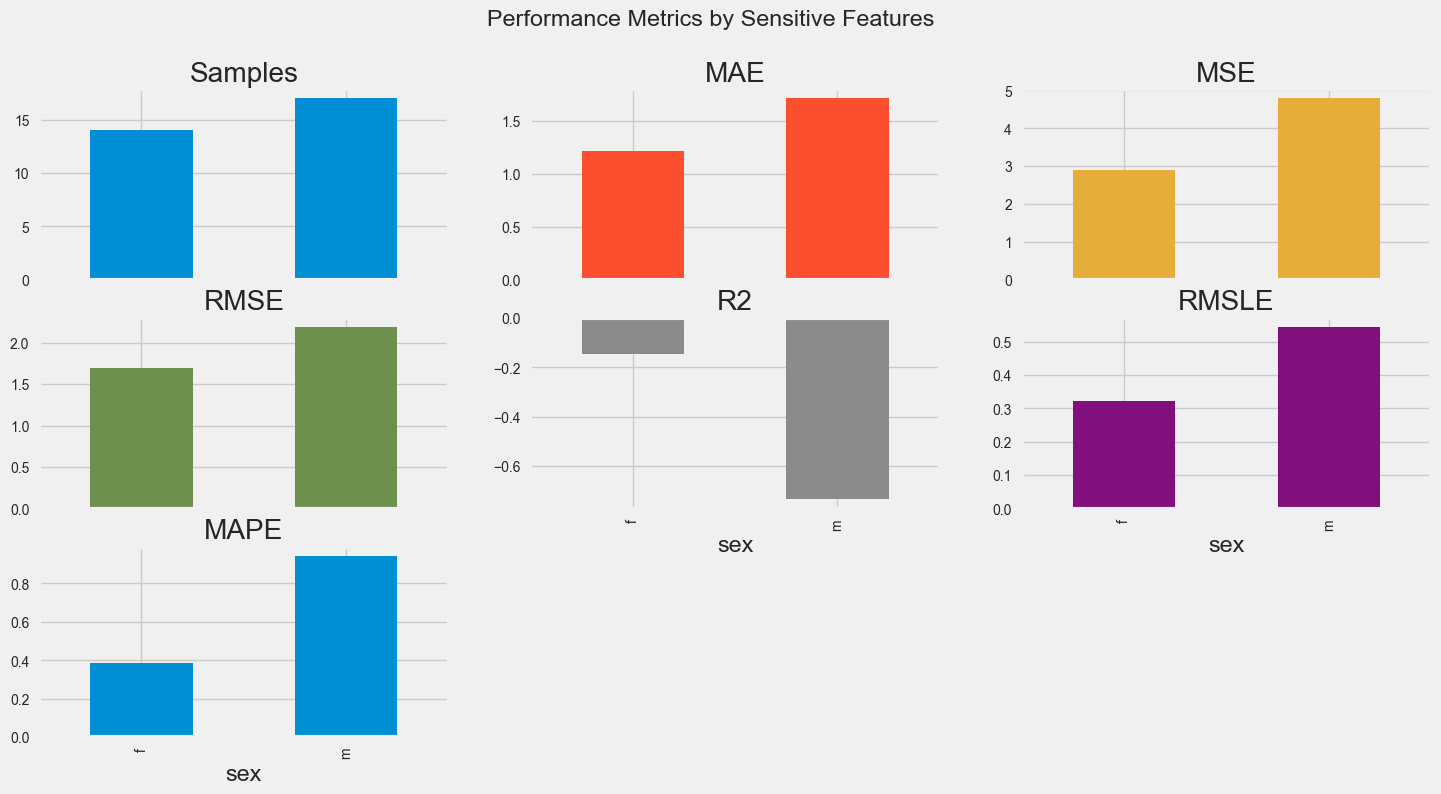

In [30]:
# check fairness
check_fairness(best_model, sensitive_features = ['sex'])

In [31]:
# save model
save_model(best_model, 'my_Possum_age_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['hdlngth', 'skullw', 'totlngth',
                                              'taill', 'footlgth', 'earconch',
                                              'eye', 'chest', 'belly'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['site', 'Pop', 'sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding...
                                                                mapping=[{'col': 'Pop',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Vic      0
 other    1
 NaN     -1
 dtype: int64},
                                                           